# Fashion Mnist data training :

In [15]:
### importing required libraries :
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
print(tf.__version__)

2.5.0


In [17]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print('train_images : ', train_images.shape)
print('train_labels : ', train_labels.shape)
print('=' * 30)
print('test_images : ', test_images.shape)
print('test_labels : ', test_labels.shape)

train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


In [18]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [19]:
len(train_images)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

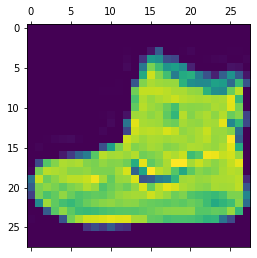

In [22]:
plt.matshow(train_images[0])

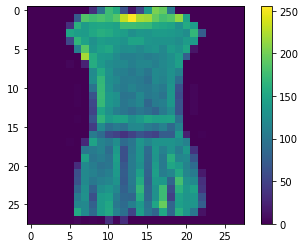

In [23]:
plt.imshow(train_images[3])
plt.colorbar()

In [24]:
#train_images

In [25]:
### Normalising data :
train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
train_labels_df = pd.DataFrame(train_labels)
train_labels_df.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

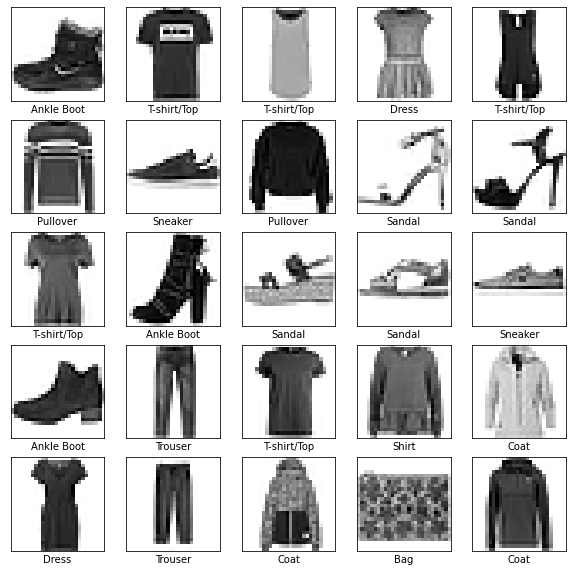

In [56]:
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building artificial neural network :

In [41]:
### Building the model :
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] 
)

model1.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4943 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3369 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2801 - accuracy: 0.8967: 0s - loss: 0.2803 - 
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 

In [42]:
### Flaatening the "test_images" data :
test_images_flattened = test_images.reshape(len(test_images), 28 * 28)
test_images_flattened.shape

(10000, 784)

In [43]:
### Evaluate the model1 :
test_loss, test_accuracy = model1.evaluate(test_images_flattened, test_labels)
print(f'test_loss : {test_loss}')
print(f'test_accuracy : {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8810
test_loss : 0.3466811180114746
test_accuracy : 0.8809999823570251


In [44]:
### Predictions :
y_pred = model1.predict(test_images_flattened)
y_pred

array([[6.28597663e-09, 1.39628167e-08, 2.45586357e-10, ...,
        1.46652227e-02, 1.87592306e-08, 9.74427342e-01],
       [7.69597682e-06, 3.48694844e-17, 9.99878645e-01, ...,
        3.31890538e-23, 1.68746024e-11, 3.97208742e-16],
       [1.04097975e-09, 1.00000000e+00, 2.32934116e-10, ...,
        1.34208770e-25, 1.56912498e-14, 1.99693396e-21],
       ...,
       [1.09095185e-04, 2.15814346e-11, 6.97572905e-05, ...,
        5.49931489e-11, 9.99608338e-01, 1.26694835e-12],
       [2.09797624e-09, 9.99999523e-01, 1.19378840e-10, ...,
        3.05679608e-13, 1.03812937e-10, 1.70580119e-10],
       [3.79462217e-05, 4.19813517e-08, 5.84470354e-06, ...,
        2.16062559e-04, 1.76545014e-04, 1.34797517e-06]], dtype=float32)

In [45]:
y_pred[0]

array([6.2859766e-09, 1.3962817e-08, 2.4558636e-10, 3.6283546e-10,
       2.6657143e-09, 1.0907454e-02, 6.5178192e-09, 1.4665223e-02,
       1.8759231e-08, 9.7442734e-01], dtype=float32)

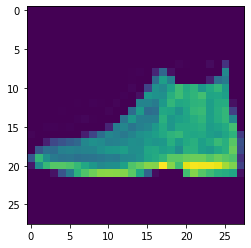

In [46]:
plt.imshow(test_images[0])

In [55]:
class_names[test_labels[0]]

'Ankle Boot'

In [48]:
y_pred

array([[6.28597663e-09, 1.39628167e-08, 2.45586357e-10, ...,
        1.46652227e-02, 1.87592306e-08, 9.74427342e-01],
       [7.69597682e-06, 3.48694844e-17, 9.99878645e-01, ...,
        3.31890538e-23, 1.68746024e-11, 3.97208742e-16],
       [1.04097975e-09, 1.00000000e+00, 2.32934116e-10, ...,
        1.34208770e-25, 1.56912498e-14, 1.99693396e-21],
       ...,
       [1.09095185e-04, 2.15814346e-11, 6.97572905e-05, ...,
        5.49931489e-11, 9.99608338e-01, 1.26694835e-12],
       [2.09797624e-09, 9.99999523e-01, 1.19378840e-10, ...,
        3.05679608e-13, 1.03812937e-10, 1.70580119e-10],
       [3.79462217e-05, 4.19813517e-08, 5.84470354e-06, ...,
        2.16062559e-04, 1.76545014e-04, 1.34797517e-06]], dtype=float32)

In [49]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [50]:
y_pred = [np.argmax(prediction) for prediction in y_pred]
y_pred[:5]

[9, 2, 1, 1, 6]

In [51]:
### confusion matrix :
cm = tf.math.confusion_matrix(y_pred, test_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[876,   3,  19,  38,   1,   0, 150,   0,   3,   0],
       [  1, 971,   2,   5,   1,   0,   1,   0,   0,   0],
       [ 29,   4, 877,  22, 158,   0, 150,   0,   5,   0],
       [ 11,  14,   6, 882,  31,   0,  19,   0,   2,   0],
       [  5,   3,  75,  27, 778,   0, 106,   0,   5,   0],
       [  1,   0,   0,   0,   0, 973,   0,   9,   2,  10],
       [ 72,   3,  20,  21,  29,   0, 562,   0,   3,   1],
       [  0,   1,   0,   0,   0,  16,   0, 972,   3,  47],
       [  5,   1,   1,   5,   2,   1,  12,   1, 977,   0],
       [  0,   0,   0,   0,   0,  10,   0,  18,   0, 942]])>

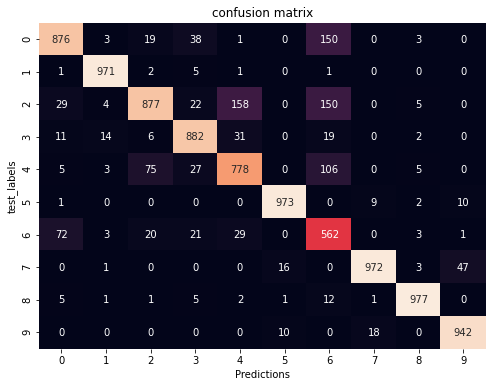

In [53]:
### plotting confusion matrix using heatmap :
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.title('confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('test_labels')
plt.show()